# IEEE Fraud Detection Kaggle Competition
## Exploratory Data Analysis

The objective of this notebook is to get an initial sense of the data and investigate the following properties:
     - What kind of data do we have at hand?
     - Get a sense of the target and its distribution
     - Missing data
     - Correlation between target and features
     - Differences between train and test

In [2]:
%%bash

ls -l

cd data 

ls -l

total 11816
-rw-r--r--  1 cchadha2  749149485  2766194 Jul 23 10:15 EDA.ipynb
-rw-r--r--  1 cchadha2  749149485  3273476 Jul 25 22:11 IDs-EDA.ipynb
-rw-r--r--  1 cchadha2  749149485      162 Jul 16 17:57 README.md
drwxr-xr-x  8 cchadha2  749149485      256 Jul 17 10:14 data
total 220088
-rw-r--r--  1 cchadha2  749149485   1193102 Jul 16 17:16 sample_submission.csv.zip
-rw-r--r--  1 cchadha2  749149485   3114671 Jul 16 17:16 test_identity.csv.zip
-rw-r--r--  1 cchadha2  749149485  49628952 Jul 16 17:16 test_transaction.csv.zip
-rw-r--r--  1 cchadha2  749149485   3166121 Jul 16 17:16 train_identity.csv.zip
-rw-r--r--  1 cchadha2  749149485  55058732 Jul 16 17:16 train_transaction.csv.zip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [4]:
train_trans = pd.read_csv('data/train_transaction.csv.zip')
test_trans = pd.read_csv('data/test_transaction.csv.zip')

test_ids = pd.read_csv('data/train_identity.csv.zip')
test_ids = pd.read_csv('data/test_identity.csv.zip')

In [5]:
SEED = 5000
train_trans.sample(20, random_state=SEED)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
142351,3129351,0,2926841,209.950,W,10762,570.0,150.0,visa,226.0,credit,428.0,87.0,NaN,NaN,gmail.com,NaN,3.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,3.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,209.949997,209.949997,209.949997,0.0,0.0,0.0,0.0,0.0,0.0,209.949997,209.949997,209.949997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561098,3548098,0,14858797,59.000,W,5815,268.0,150.0,visa,166.0,debit,269.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.

Initial observations:
- from competition: "The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp)." These could be seconds since transaction?
- card features are categorical (from data tab) and related to physical(/virtual?) card used to make online purchase
- Is TransactionAmt the same currency throughout? Could this be normalized?
- addr1 is area? addr2 is country?. Worth plotting their distributions
- Distribution and chi-square between ProductCD and label? 
- P_emaildomain and R_emaildomain for purchasing email address and retailer email address? Could be Amazon/eBay sellers?
- D features have a lot of missing values
- M4 has values of M1, M2, M3, which are also features as well as some mystery M0
- V features have a lot of missing values throughout in blocks. Seem to be mainly integer valued

In [6]:
train_trans.shape

(590540, 394)

In [7]:
len(train_trans['TransactionID'].unique())

590540

Target distribution. Significant class imbalance in training data. Most cases are not fraud. We saw this previously in Home Credit Risk competition. Some sort of downsampling/upsampling may be the way to go here.

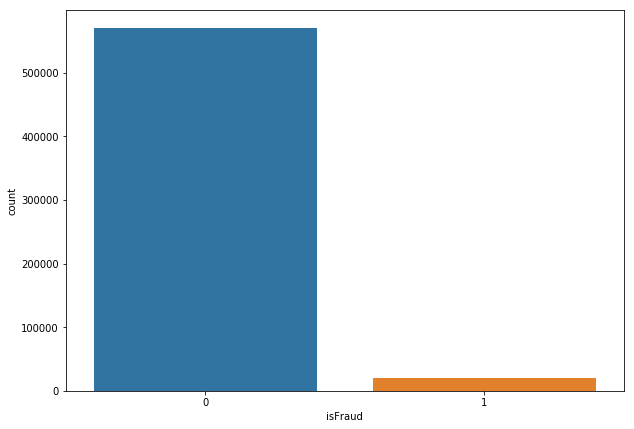

In [8]:
fig = plt.figure(figsize=(10,7))
sns.countplot(train_trans['isFraud'])

Calculating stats for the transaction data

In [9]:
train_trans_stats = train_trans.describe(include='all')

In [10]:
train_trans_stats.loc['max', 'TransactionDT']

15811131.0

In [11]:
train_trans_stats.loc['min', 'TransactionDT']

86400.0

Maybe these are seconds?

In [12]:
train_trans_stats.loc['max', 'TransactionDT'] / (60*60*24) / 30

6.099973379629629

In [13]:
train_trans_stats.loc['min', 'TransactionDT'] / (60*60*24)

1.0

The earliest cut off could be about 6 months ago with the latest cut off being 24 hours ago

In [14]:
train_trans_stats.loc['na'] = train_trans.shape[0] - train_trans_stats.loc['count']

Looking at distributions of card features:

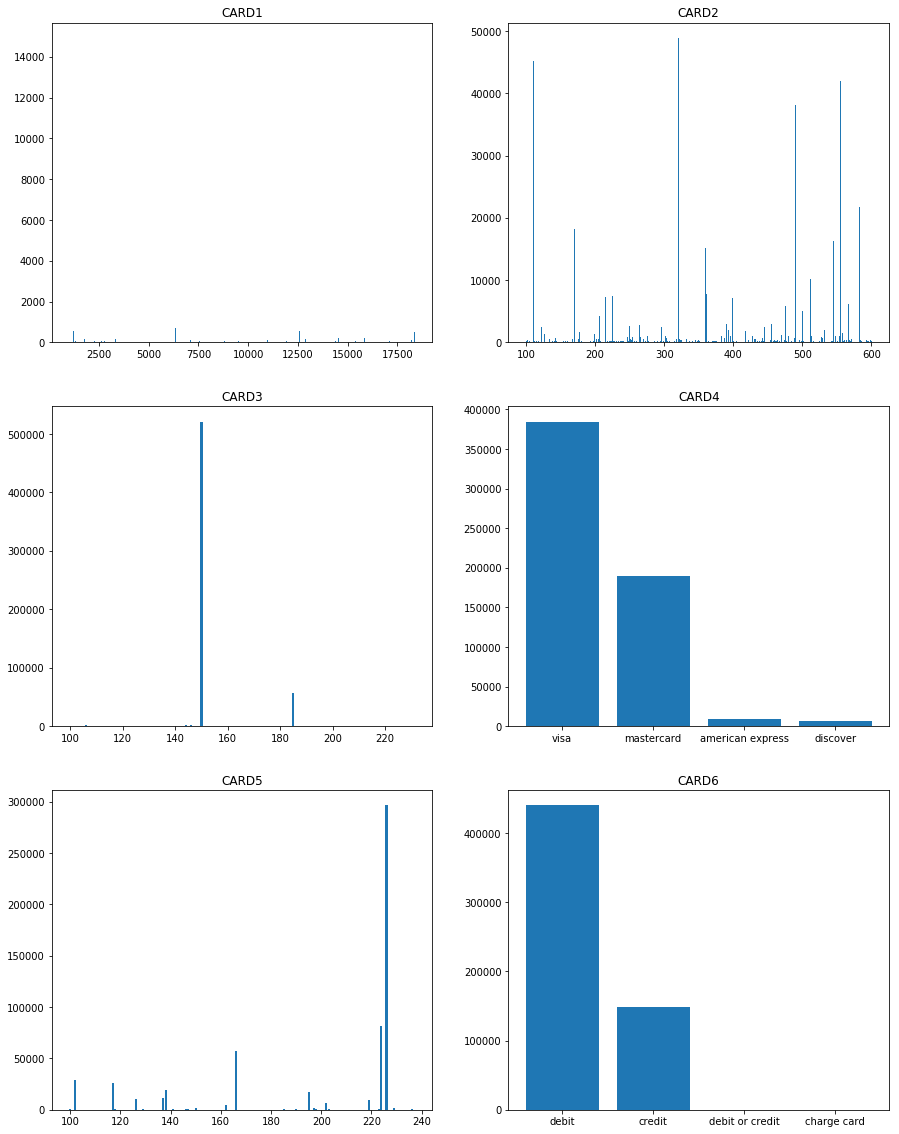

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (15,20))

for ax, feature in zip(axes.flatten(), ['card' + str(x) for x in range(1,7)]):
    ax.bar(train_trans[feature].value_counts().index, train_trans[feature].value_counts().values)
    ax.set(title=feature.upper())

A lot of visa cards and debit cards. Perhaps most fraud is committed using credit cards?

[Text(0.5, 1.0, 'MISSING')]

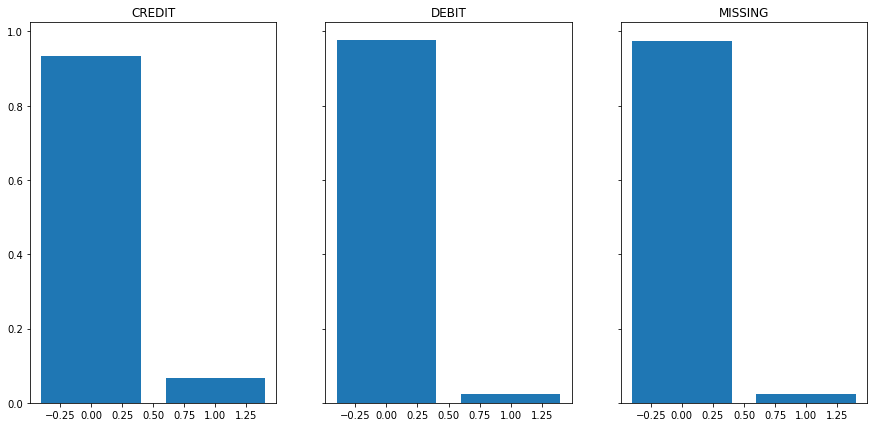

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,7), sharey=True)

for ax, card_type in zip(axes.flatten(), ['credit', 'debit']):
    ax.bar(train_trans[train_trans['card6'] == card_type]['isFraud'].value_counts().index,
           train_trans[train_trans['card6'] == card_type]['isFraud'].value_counts().values/\
           train_trans[train_trans['card6'] == card_type]['isFraud'].value_counts().sum())
    ax.set(title=card_type.upper())
    
    
axes[2].bar(train_trans[train_trans['card6'].isna()]['isFraud'].value_counts().index,
            train_trans[train_trans['card6'].isna()]['isFraud'].value_counts().values/\
            train_trans[train_trans['card6'].isna()]['isFraud'].value_counts().sum())
axes[2].set(title='Missing'.upper())

Interesting! Looks like some more fraudulent transactions with credit cards for sure. Let's look at a similar breakdown between Visa and Mastercard. 

Definitely more fraud with credit cards alright. 

[Text(0.5, 1.0, 'MISSING')]

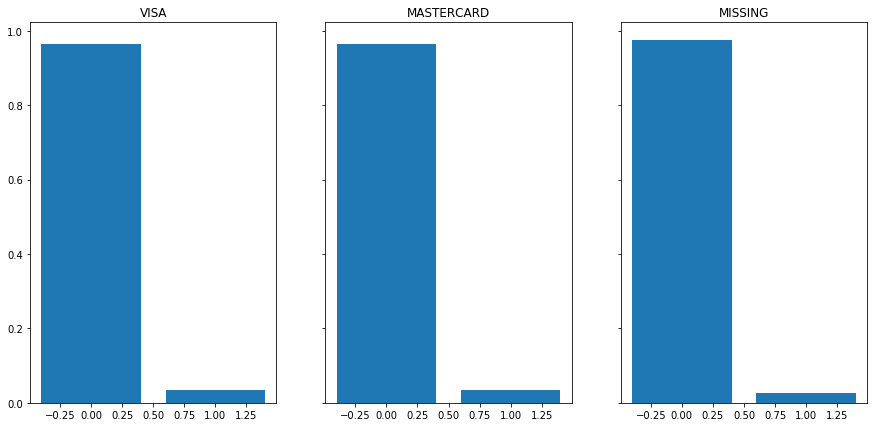

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,7), sharey=True)

for ax, card_type in zip(axes.flatten(), ['visa', 'mastercard']):
    ax.bar(train_trans[train_trans['card4'] == card_type]['isFraud'].value_counts().index,
           train_trans[train_trans['card4'] == card_type]['isFraud'].value_counts().values/\
           train_trans[train_trans['card4'] == card_type]['isFraud'].value_counts().sum())
    ax.set(title=card_type.upper())
    
axes[2].bar(train_trans[train_trans['card4'].isna()]['isFraud'].value_counts().index,
            train_trans[train_trans['card4'].isna()]['isFraud'].value_counts().values/\
            train_trans[train_trans['card4'].isna()]['isFraud'].value_counts().sum())
axes[2].set(title='Missing'.upper())

About the same across the board here.

Looking at distributions of categorical variables

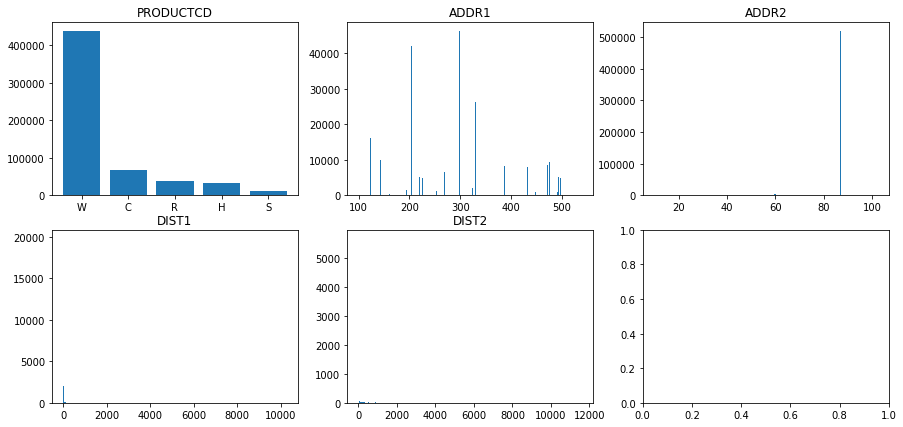

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15,7))

for ax, feature in zip(axes.flatten(), ['ProductCD', 'addr1', 'addr2', 'dist1','dist2']):
    ax.bar(train_trans[feature].value_counts().index, train_trans[feature].value_counts().values)
    ax.set(title=feature.upper())

ProductCD could be some sort of grouping for types of products purchased.

Interesting that almost all of the addr2 values lie at 87 - maybe this really is a country code from a pretty homogenous dataset. Doesn't look like addr1 is an area code - no 264 code in the States anyway.

In [22]:
p_emails = pd.DataFrame(data={'email_domains':train_trans['P_emaildomain'].value_counts().index,
                      'email_counts':train_trans['P_emaildomain'].value_counts().values})

r_emails = pd.DataFrame(data={'email_domains':train_trans['R_emaildomain'].value_counts().index,
                      'email_counts':train_trans['R_emaildomain'].value_counts().values})

No handles with labels found to put in legend.


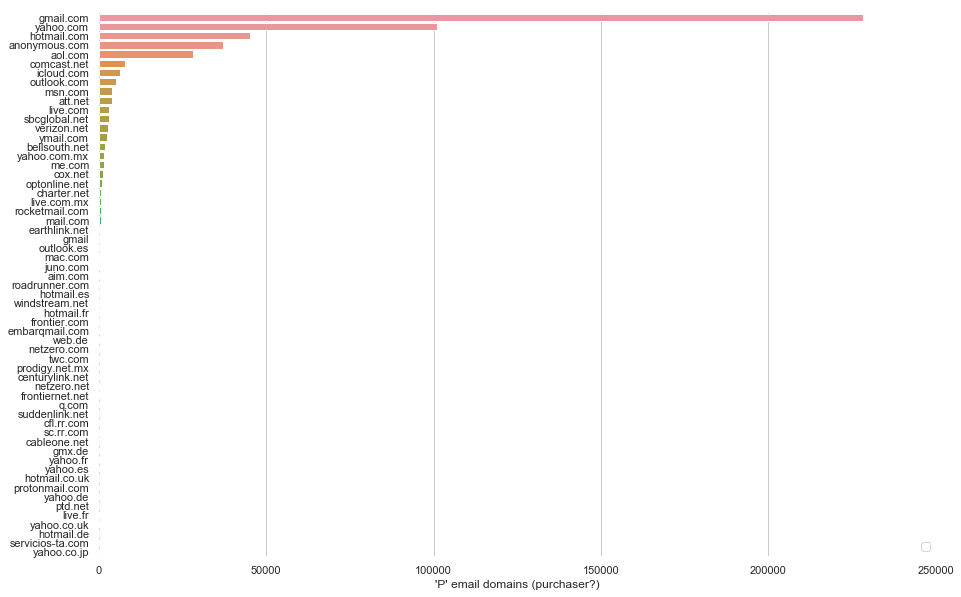

In [106]:
fig = plt.figure(figsize=(15,10))

sns.set(style="whitegrid")

ax = sns.barplot(x='email_counts', y='email_domains', data=p_emails)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 250000), ylabel="",
       xlabel="'P' email domains (purchaser?)")
sns.despine(left=True, bottom=True)

No handles with labels found to put in legend.


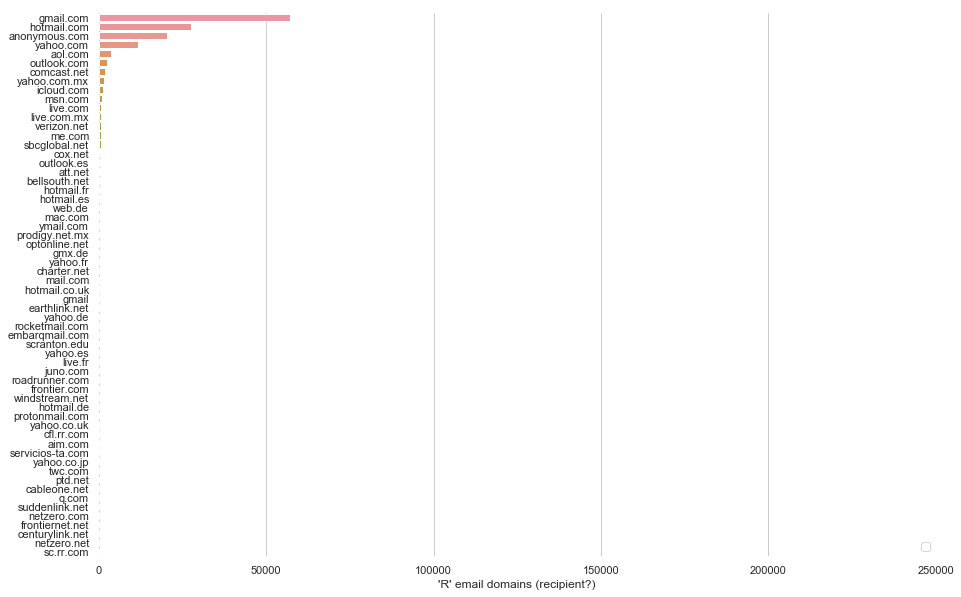

In [105]:
fig = plt.figure(figsize=(15,10))

sns.set(style="whitegrid")

ax = sns.barplot(x='email_counts', y='email_domains', data=r_emails)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 250000), ylabel="",
       xlabel="'R' email domains (recipient?)")
sns.despine(left=True, bottom=True)

Both domains dominated by gmail accounts. Let's see if theres any association between the domains and the label.

[Text(0.5, 1.0, 'MISSING')]

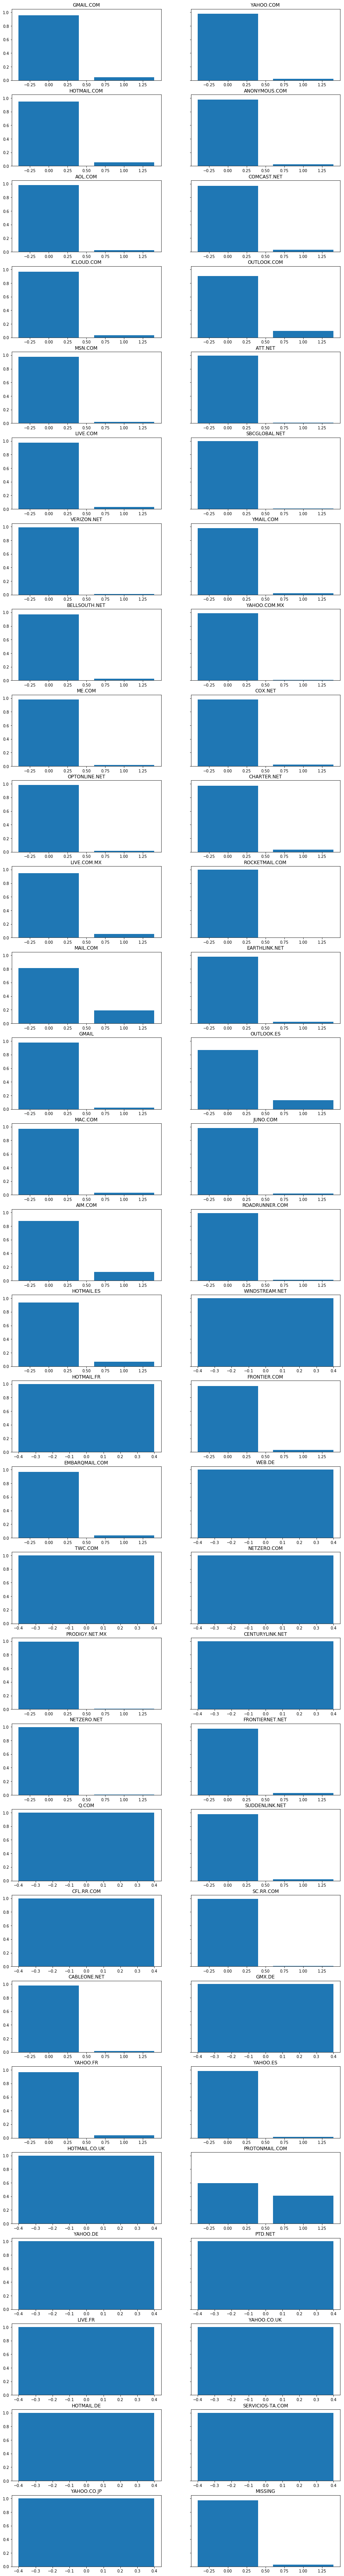

In [24]:
fig, axes = plt.subplots(nrows=30, ncols=2, figsize = (15,120), sharey=True)

for ax, email_domain in zip(axes.flatten(), p_emails['email_domains']):
    ax.bar(train_trans[train_trans['P_emaildomain'] == email_domain]['isFraud'].value_counts().index,
           train_trans[train_trans['P_emaildomain'] == email_domain]['isFraud'].value_counts().values/\
           train_trans[train_trans['P_emaildomain'] == email_domain]['isFraud'].value_counts().sum())
    ax.set(title=email_domain.upper())
    
axes[29,1].bar(train_trans[train_trans['P_emaildomain'].isna()]['isFraud'].value_counts().index,
            train_trans[train_trans['P_emaildomain'].isna()]['isFraud'].value_counts().values/\
            train_trans[train_trans['P_emaildomain'].isna()]['isFraud'].value_counts().sum())
axes[29,1].set(title='Missing'.upper())

protonmail.com will be important for our model as well as mail.com, outlook.es, and aim.com to lesser extents. There aren't many of these domains in the P_emaildomain column though, let's check their counts in test and double check their counts in train

In [134]:
useful_p_domains = ['protonmail.com', 'mail.com', 'outlook.es', 'aim.com']

In [157]:
p_train_emails = p_emails[p_emails['email_domains'].isin(useful_p_domains)]
p_train_emails['email_counts %'] = (p_train_emails['email_counts']*100)/len(train_trans)
p_train_emails

/Users/cchadha2/anaconda3/envs/eda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,email_domains,email_counts,email_counts %
22,mail.com,559,0.094659
25,outlook.es,438,0.074169
28,aim.com,315,0.053341
51,protonmail.com,76,0.012870


In [158]:
p_test_emails = pd.DataFrame(data={'email_domains':test_trans['P_emaildomain'].value_counts().index,
                      'email_counts':test_trans['P_emaildomain'].value_counts().values})

p_test_emails = p_test_emails[p_test_emails['email_domains'].isin(useful_p_domains)]
p_test_emails['email_counts %'] = (p_test_emails['email_counts']*100)/len(test_trans)
p_test_emails

,email_domains,email_counts,email_counts %
21,mail.com,597,0.117823
26,outlook.es,425,0.083878
42,aim.com,153,0.030196
52,protonmail.com,83,0.016381


Similar counts between the two datasets. Happy days!

[Text(0.5, 1.0, 'MISSING')]

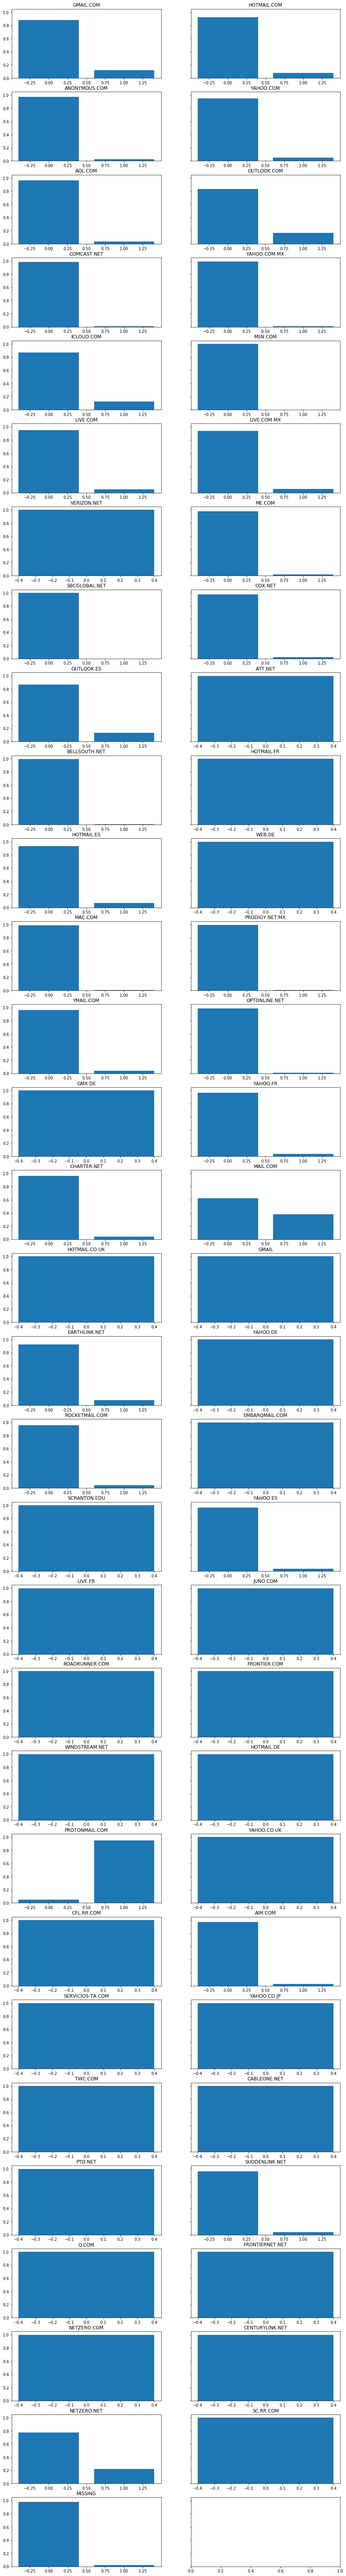

In [25]:
fig, axes = plt.subplots(nrows=31, ncols=2, figsize = (15,120), sharey=True)

for ax, email_domain in zip(axes.flatten(), r_emails['email_domains']):
    ax.bar(train_trans[train_trans['R_emaildomain'] == email_domain]['isFraud'].value_counts().index,
           train_trans[train_trans['R_emaildomain'] == email_domain]['isFraud'].value_counts().values/\
           train_trans[train_trans['R_emaildomain'] == email_domain]['isFraud'].value_counts().sum())
    ax.set(title=email_domain.upper())
    
axes[30,0].bar(train_trans[train_trans['R_emaildomain'].isna()]['isFraud'].value_counts().index,
            train_trans[train_trans['R_emaildomain'].isna()]['isFraud'].value_counts().values/\
            train_trans[train_trans['R_emaildomain'].isna()]['isFraud'].value_counts().sum())
axes[30,0].set(title='Missing'.upper())

In [161]:
useful_r_domains = ['protonmail.com', 'mail.com', 'outlook.es', 'outlook.com', 'netzero.net']
r_train_emails = r_emails[r_emails['email_domains'].isin(useful_r_domains)]
r_train_emails['email_counts %'] = (r_train_emails['email_counts']*100)/len(train_trans)
r_train_emails

/Users/cchadha2/anaconda3/envs/eda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,email_domains,email_counts,email_counts %
5,outlook.com,2507,0.424527
16,outlook.es,433,0.073323
29,mail.com,122,0.020659
44,protonmail.com,41,0.006943
58,netzero.net,9,0.001524


In [160]:
r_test_emails = pd.DataFrame(data={'email_domains':test_trans['R_emaildomain'].value_counts().index,
                      'email_counts':test_trans['R_emaildomain'].value_counts().values})

r_test_emails = r_test_emails[r_test_emails['email_domains'].isin(useful_r_domains)]
r_test_emails['email_counts %'] = (r_test_emails['email_counts']*100)/len(test_trans)
r_test_emails

,email_domains,email_counts,email_counts %
5,outlook.com,2504,0.494187
16,outlook.es,420,0.082891
22,mail.com,219,0.043222
48,protonmail.com,34,0.006710
56,netzero.net,10,0.001974


Same again here. Good to see.

Let's check the distribution of transaction amounts

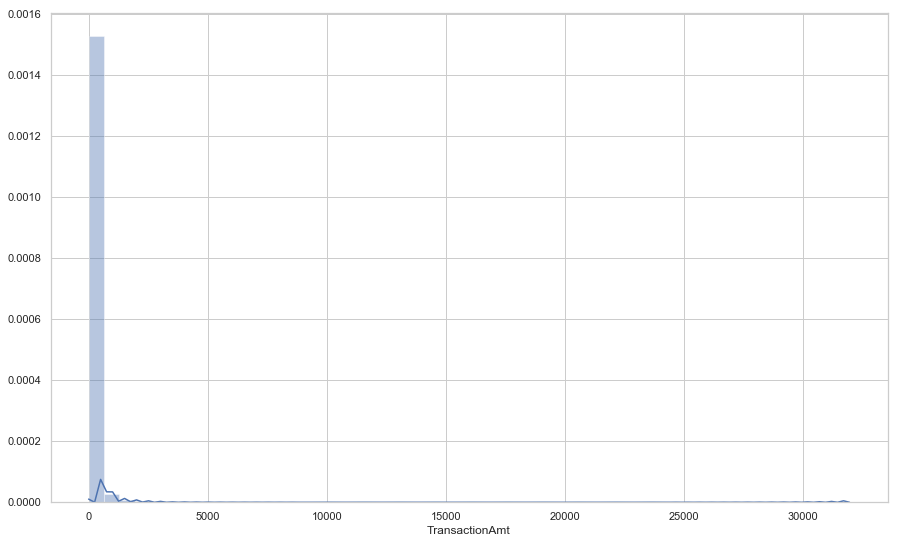

In [187]:
plt.figure(figsize=(15,9))
sns.distplot(train_trans['TransactionAmt'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


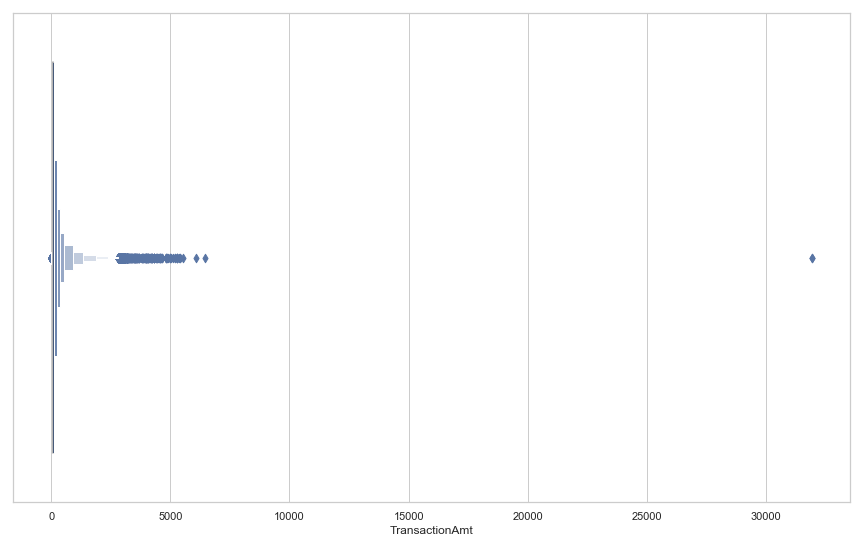

In [200]:
plt.figure(figsize=(15,9))
sns.boxenplot(train_trans['TransactionAmt'])

Mostly transactions around 0 but looks like some extremely expensive ones too around 30000. Are these extreme transactions straight up fraud?

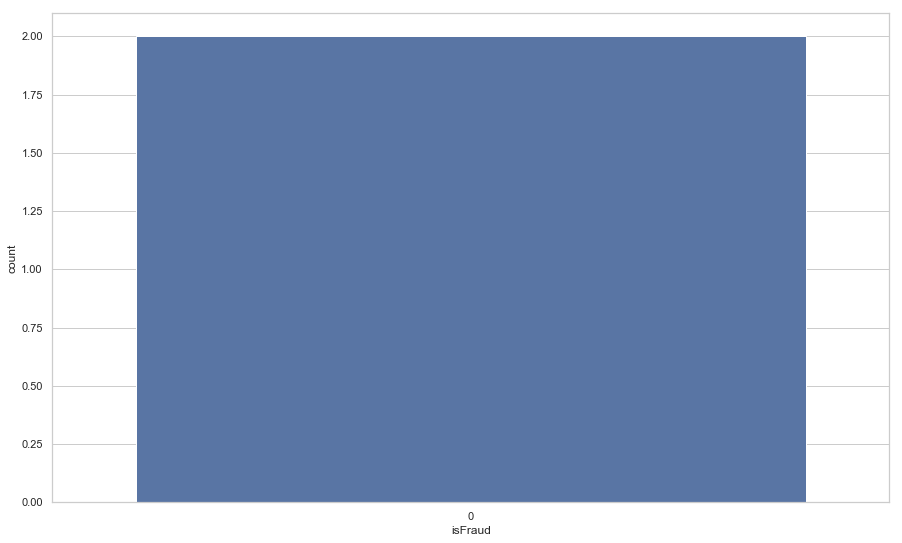

In [201]:
plt.figure(figsize=(15,9))
sns.countplot(train_trans[train_trans['TransactionAmt'] > 30000]['isFraud'])

Nope. Could be missing values. Let's look at them:

In [202]:
train_trans[train_trans['TransactionAmt'] > 30000]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
274336,3261336,0,6652360,31937.391,W,16075,514.0,150.0,mastercard,102.0,credit,205.0,87.0,27.0,NaN,yahoo.com,NaN,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,NaN,NaN,NaN,F,F,T,1.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1422.390015,1422.390015,1422.390015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1422.390015,1422.390015,1422.390015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274339,3261339,0,6652391,31937.391,W,16075,514.0,150.0,mastercard,102.0,credit,205.0,87.0,27.0,NaN,yahoo.com,NaN,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,T,NaN,NaN,NaN,F,F,T,1.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0

Difficult to say what's going on here? Let's see if there's any similar rows in test.

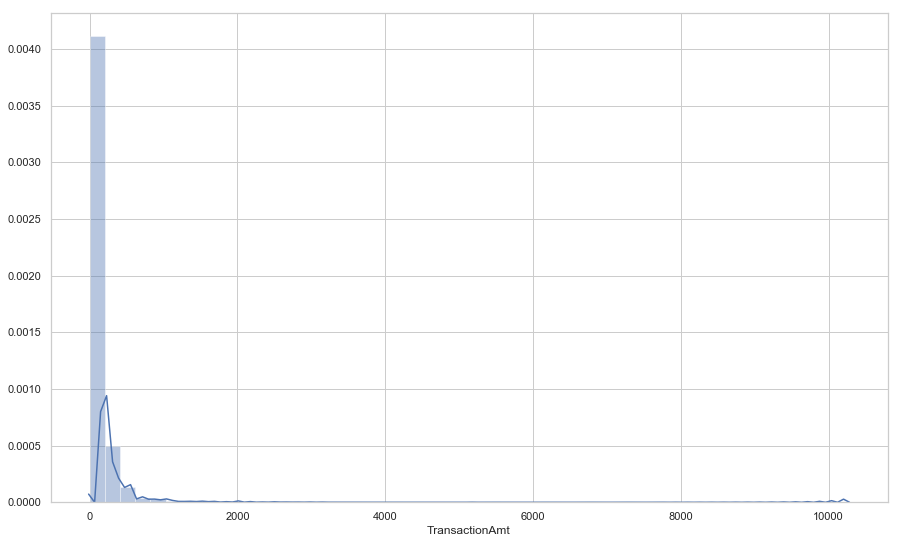

In [205]:
plt.figure(figsize=(15,9))
sns.distplot(test_trans['TransactionAmt'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


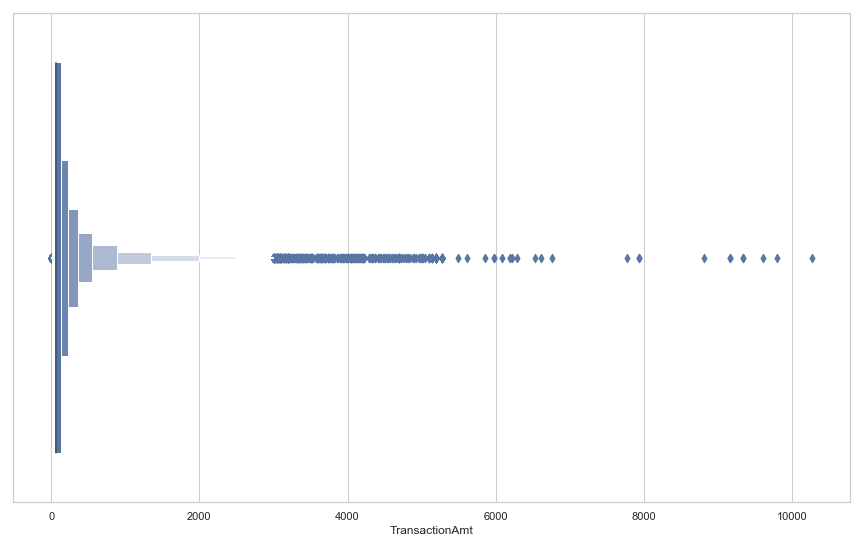

In [203]:
plt.figure(figsize=(15,9))
sns.boxenplot(test_trans['TransactionAmt'])

In [206]:
train_trans['TransactionAmt'].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [207]:
test_trans['TransactionAmt'].describe()

count    506691.000000
mean        134.725568
std         245.779822
min           0.018000
25%          40.000000
50%          67.950000
75%         125.000000
max       10270.000000
Name: TransactionAmt, dtype: float64

Nope. If anything, train is narrower around 0 than test is with the exception of the 30000 value outliers. Let's remove these and re-plot the train distribution

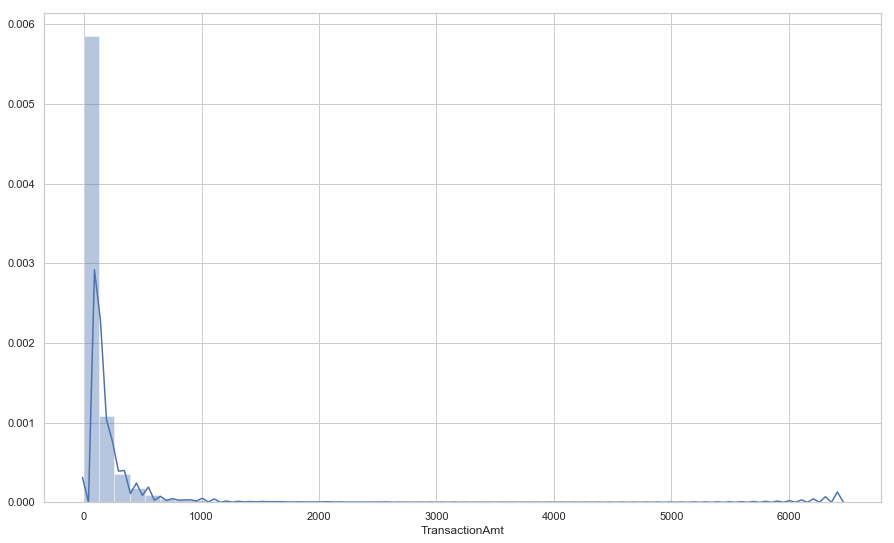

In [210]:
plt.figure(figsize=(15,9))
sns.distplot(train_trans[train_trans['TransactionAmt'] < 30000]['TransactionAmt'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


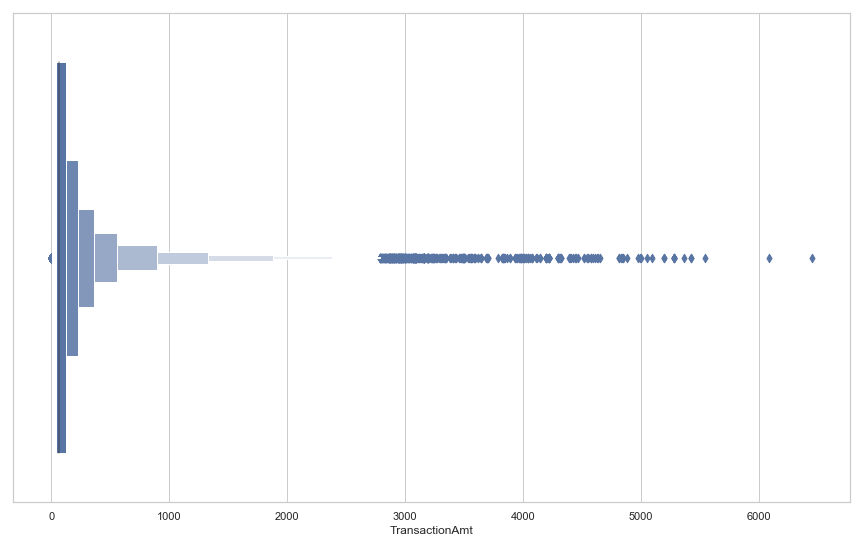

In [209]:
plt.figure(figsize=(15,9))
sns.boxenplot(train_trans[train_trans['TransactionAmt'] < 30000]['TransactionAmt'])

That makes a lot more sense. It might be worthwhile to obtain a z-score for each value in this feature so we can easily see the variance between points

Looking at transactions above the 75th percentile

In [211]:
train_trans[train_trans['TransactionAmt'] > 125]['isFraud'].value_counts()

0    139355
1      6473
Name: isFraud, dtype: int64

[Text(0, 0.5, 'Normalized count'),
 Text(0.5, 0, 'isFraud'),
 Text(0.5, 1.0, 'TRANSACTION AMOUNTS < 75TH PERCENTILE')]

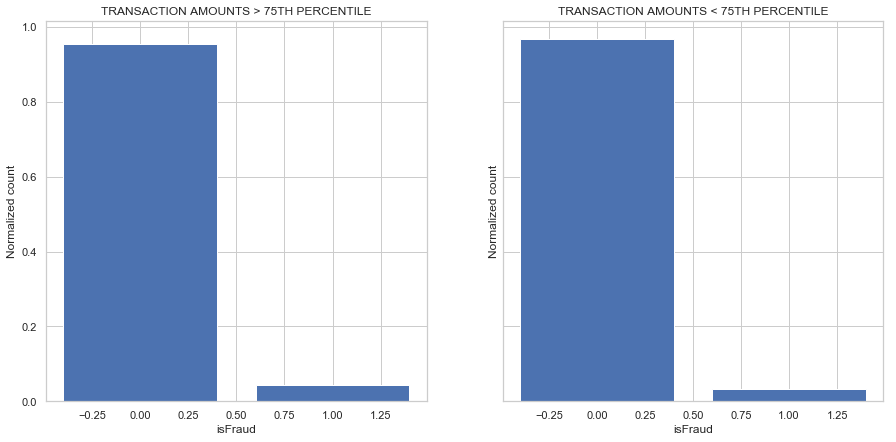

In [215]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,7), sharey=True)

axes = axes.flatten()

axes[0].bar(train_trans[train_trans['TransactionAmt'] > 125]['isFraud'].value_counts().index,
            train_trans[train_trans['TransactionAmt'] > 125]['isFraud'].value_counts().values/\
            train_trans[train_trans['TransactionAmt'] > 125]['isFraud'].value_counts().sum())
axes[0].set(title='Transaction amounts > 75th percentile'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

axes[1].bar(train_trans[train_trans['TransactionAmt'] < 125]['isFraud'].value_counts().index,
            train_trans[train_trans['TransactionAmt'] < 125]['isFraud'].value_counts().values/\
            train_trans[train_trans['TransactionAmt'] < 125]['isFraud'].value_counts().sum())
axes[1].set(title='Transaction amounts < 75th percentile'.upper(),
            ylabel = 'Normalized count',
            xlabel = 'isFraud')

Slightly more fraudulent transactions above 125 - makes sense. If you're going to commit fraud, go big?

Looking at missing values among features:

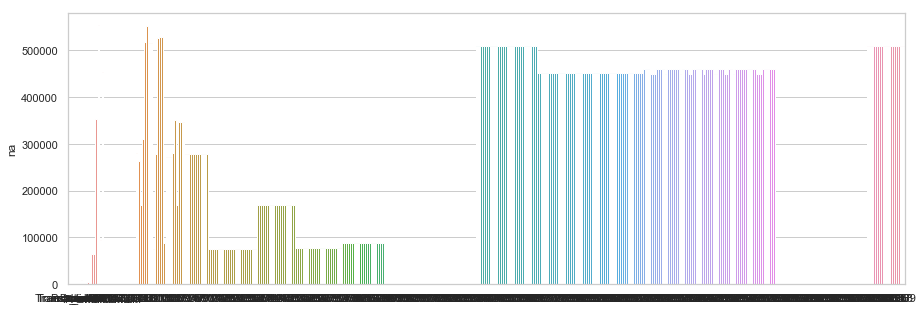

In [216]:
fig = plt.figure(figsize=(15,5))
ax = sns.barplot(x=train_trans_stats.columns, y=train_trans_stats.loc['na'])

Quite a lot of missing values spread throughout dataset. A lot of features, that are presumably similar - particularly towards the right side of plot are consistently missing most of their values so this likely isn't an error in recording. The values are probably missing for a reason.

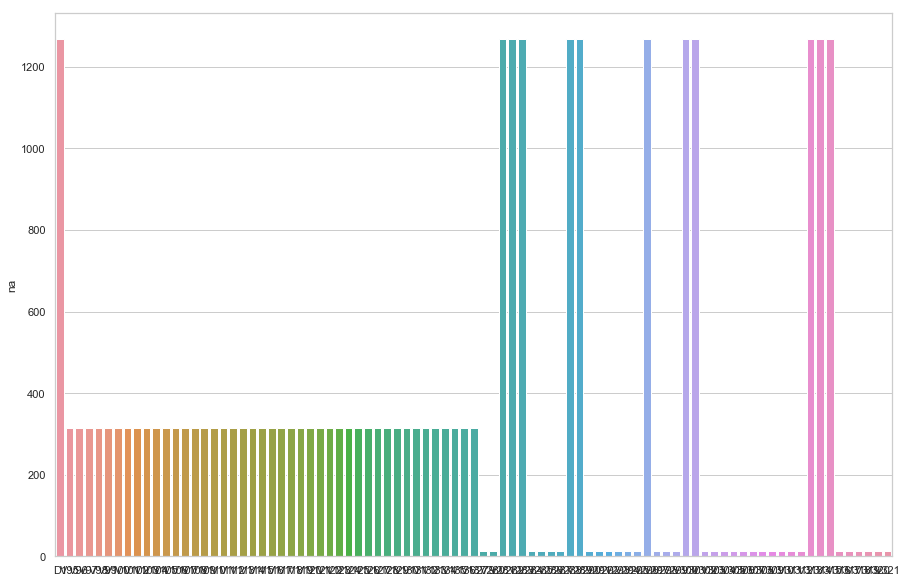

In [217]:
fig = plt.figure(figsize=(15,10))
ax = sns.barplot(x=train_trans_stats.loc[:, (train_trans_stats.loc['na'] > 0) & (train_trans_stats.loc['na'] < 1500)].columns,
                 y=train_trans_stats.loc[:, (train_trans_stats.loc['na'] > 0) & (train_trans_stats.loc['na'] < 1500)].loc['na'])


These features with only a few missing values (comparitively) are also missing equal numbers of values so this probably isn't recording error.

In [218]:
'No. of featues without NaNs: {}'.format(len(train_trans_stats.loc[:, train_trans_stats.loc['na'] == 0].columns))

'No. of featues without NaNs: 20'

Digging into features that are missing most of their values

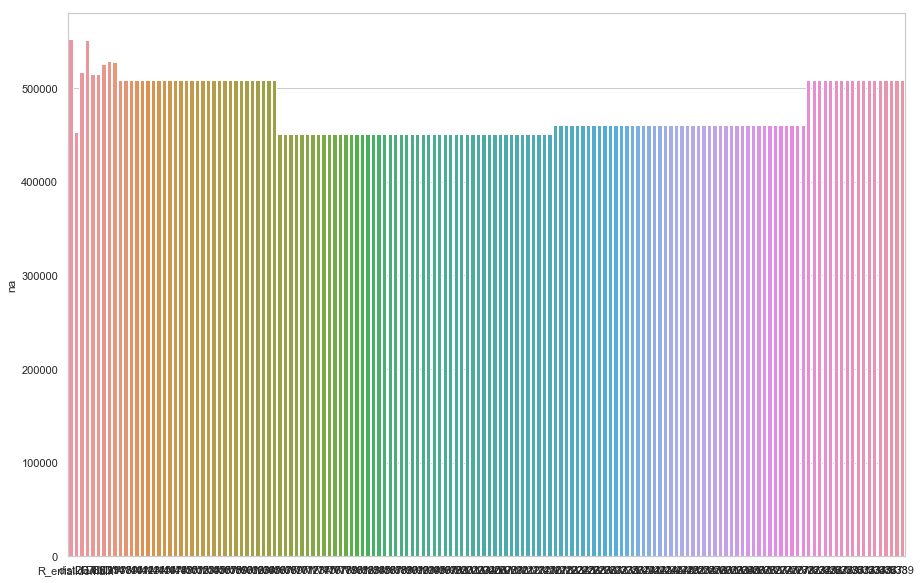

In [219]:
fig = plt.figure(figsize=(15,10))
ax = sns.barplot(x=train_trans_stats.loc[:, train_trans_stats.loc['na'] > 450000].columns,
                 y=train_trans_stats.loc[:, train_trans_stats.loc['na'] > 450000].loc['na'])

In [220]:
train_trans_stats.loc[:, train_trans_stats.loc['na'] > 450000].columns.values

array(['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13',
       'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144',
       'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152',
       'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160',
       'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168',
       'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176',
       'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184',
       'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192',
       'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200',
       'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208',
       'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216',
       'V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228',
       'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237',
       'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248',
       

Let's look into some of these "V" features

In [ ]:
v_features = train_trans_stats.loc[:, train_trans_stats.loc['na'] > 450000].columns.values[9:].tolist()

In [222]:
len(v_features)

143

Looking at first 30:

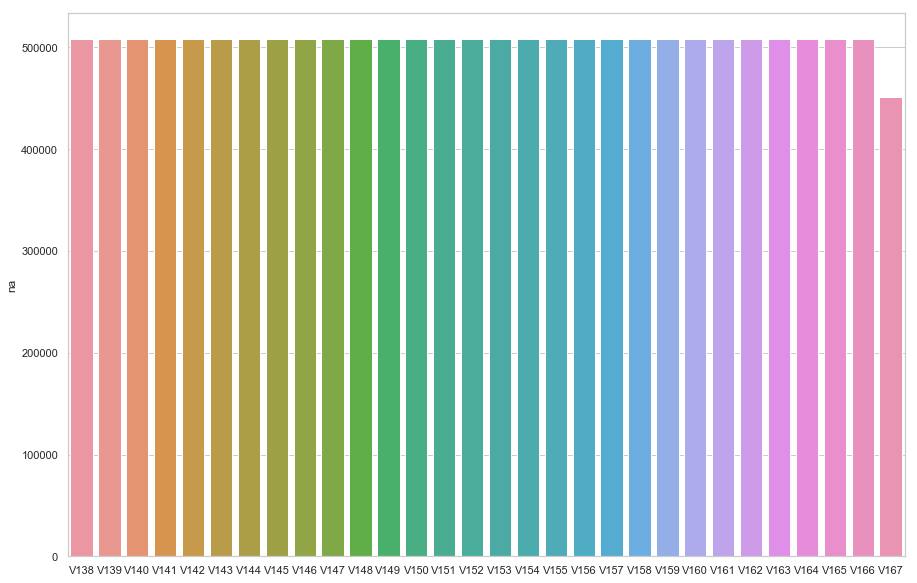

In [223]:
fig = plt.figure(figsize=(15,10))
ax = sns.barplot(x=v_features[:30],
                 y=train_trans_stats.loc[:, v_features[:30]].loc['na'])

In [224]:
train_trans['V138'].dtype

dtype('float64')

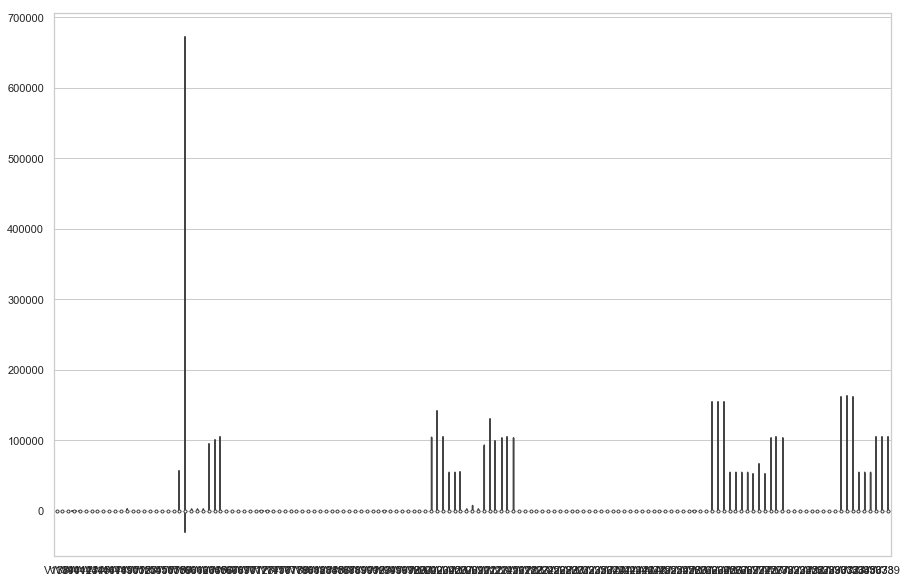

In [225]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(data=train_trans.loc[:, v_features])

Looks like even among the features that have the exact same number of missing values, we have pretty different distributions - but it's a bit difficult to tell from this plot due to differences in scale 

In [226]:
train_trans.loc[:, v_features].head(10)

,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V223,V224,V225,V226,V228,V229,V230,V231,V232,V233,V235,V236,V237,V240,V241,V242,V243,V244,V246,V247,V248,V249,V252,V253,V254,V257,V258,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V273,V274,V275,V276,V277,V278,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,6.0,18.0,140.0,0.0,0.0,0.0,0.0,1803.0,49.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15557.990234,169690.796875,0.0,0.0,0.0,515.0,5155.0,2840.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Looks like these features have simultaneous missing values - it will be interesting to see how important these anonymised continuous features are to any models we train. Another interesting point to note is that each of these features seems to have integer values despite being decimal value types in the data.

Let's plot all of their distributions

In [ ]:
fig, axes = plt.subplots(nrows=36, ncols=4, figsize = (15,130))

for ax, feature in zip(axes.flatten(), v_features):
    ax.bar(train_trans[feature].value_counts().index, train_trans[feature].value_counts().values)
    ax.set(title=feature.upper())

Interesting that all the "V" features have values primarily at 0 or 1 have a positive skew. Again note that these are integers. It looks like they may be counts of values whose existence may possibly be determined by a categorical variable or variables elsewhere in the data. Let's see if this is similar for the "D" features that are missing a lot of values:

In [295]:
d_features = train_trans_stats.loc[:, train_trans_stats.loc['na'] > 450000].columns.values[2:8].tolist()

In [296]:
d_features

['D6', 'D7', 'D8', 'D9', 'D12', 'D13']

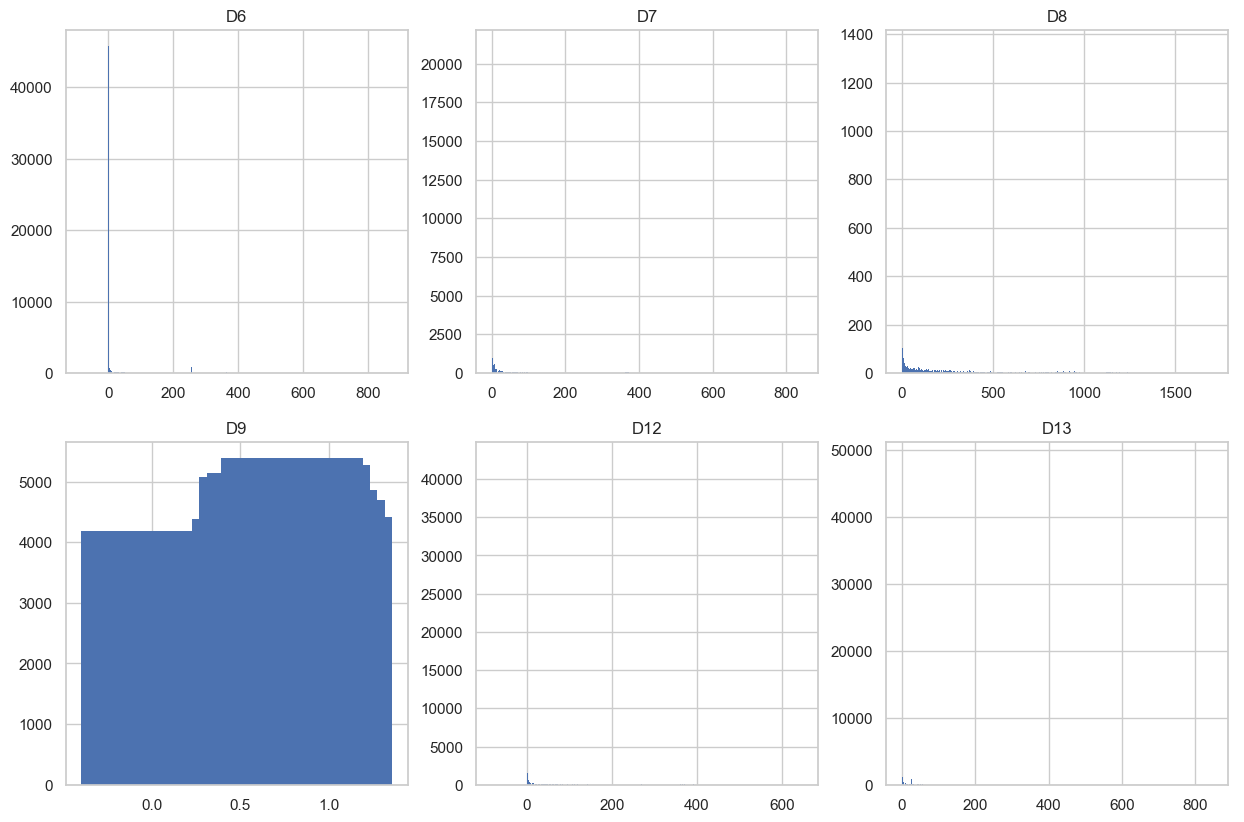

In [304]:
import matplotlib as mpl
import importlib
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15,10))

for ax, feature in zip(axes.flatten(), d_features):
    ax.bar(train_trans[feature].value_counts().index, train_trans[feature].value_counts().values)
    ax.set(title=feature.upper())

Looks like each of the D features follow a similar pattern except for D9 - let's remove this feature and re-plot

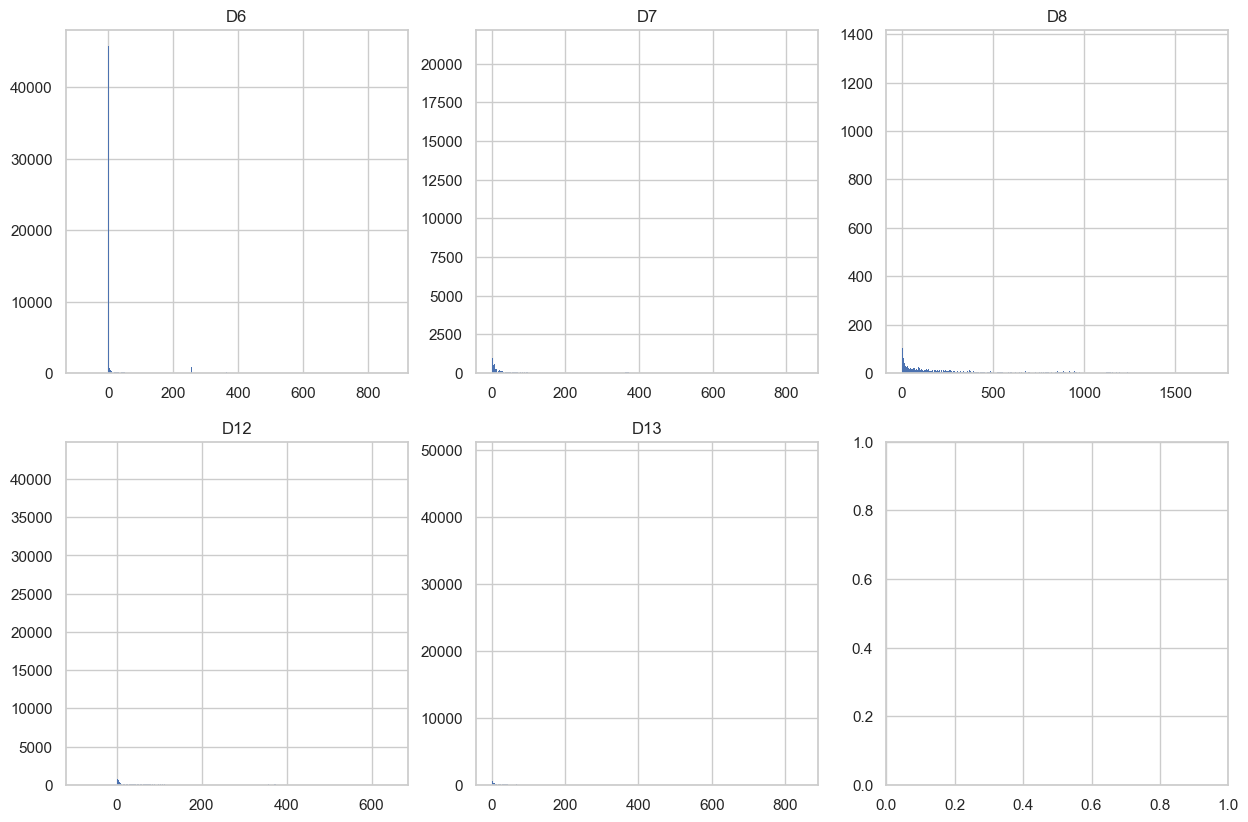

In [305]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15,10))

for ax, feature in zip(axes.flatten(), [feature for feature in d_features if feature not in 'D9']):
    ax.bar(train_trans[feature].value_counts().index, train_trans[feature].value_counts().values)
    ax.set(title=feature.upper())

Yep - looks like a similar pattern here with even more of a concentration of values at 0. Let's see if we're still dealing with integers:

In [232]:
train_trans_stats[d_features]

,D6,D7,D8,D9,D12,D13
count,73187.000000,38917.000000,74926.000000,74926.000000,64717.000000,61952.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN
mean,69.805717,41.638950,146.058108,0.561057,54.037533,17.901295
std,143.669253,99.743264,231.663840,0.316880,124.274558,67.614425
min,-83.000000,0.000000,0.000000,0.000000,-83.000000,0.000000
25%,0.000000,0.000000,0.958333,0.208333,0.000000,0.000000
50%,0.000000,0.000000,37.875000,0.666666,0.000000,0.000000
75%,40.000000,17.000000,187.958328,0.833333,13.000000,0.000000


Each of the features is an int feature except for D9, which looks to be some sort of ratio or likelihood, and D8.

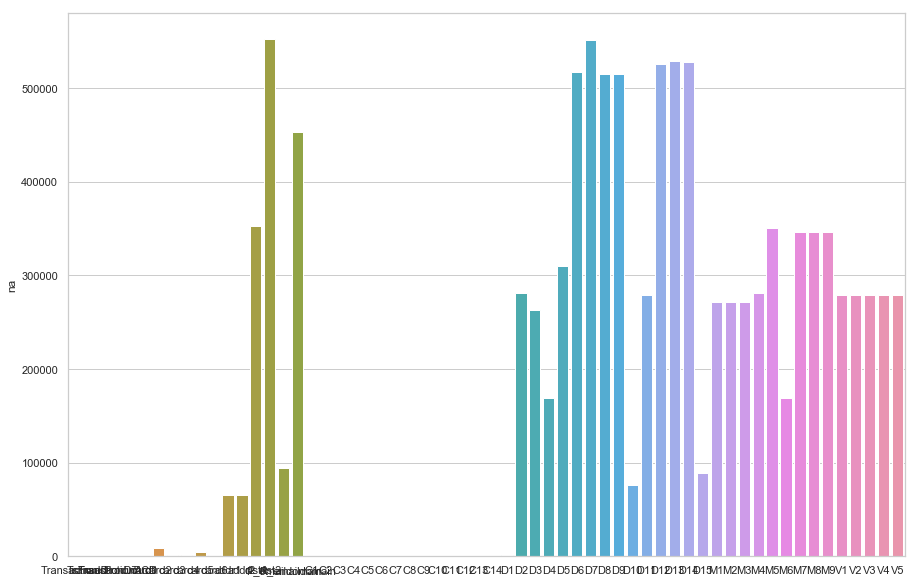

In [233]:
fig = plt.figure(figsize=(15,10))
ax = sns.barplot(x=train_trans_stats.columns[:60], y=train_trans_stats.loc['na'][:60])

These features among the first 60 may be missing values that can be imputed since the number of values missing don't seem to be systematic. These features are among:

Looking at the features with most missing values here:

Mostly the "D" features again. How many of these are there?

In [235]:
len([column for column in train_trans.columns.tolist() if column.startswith('D')])

15

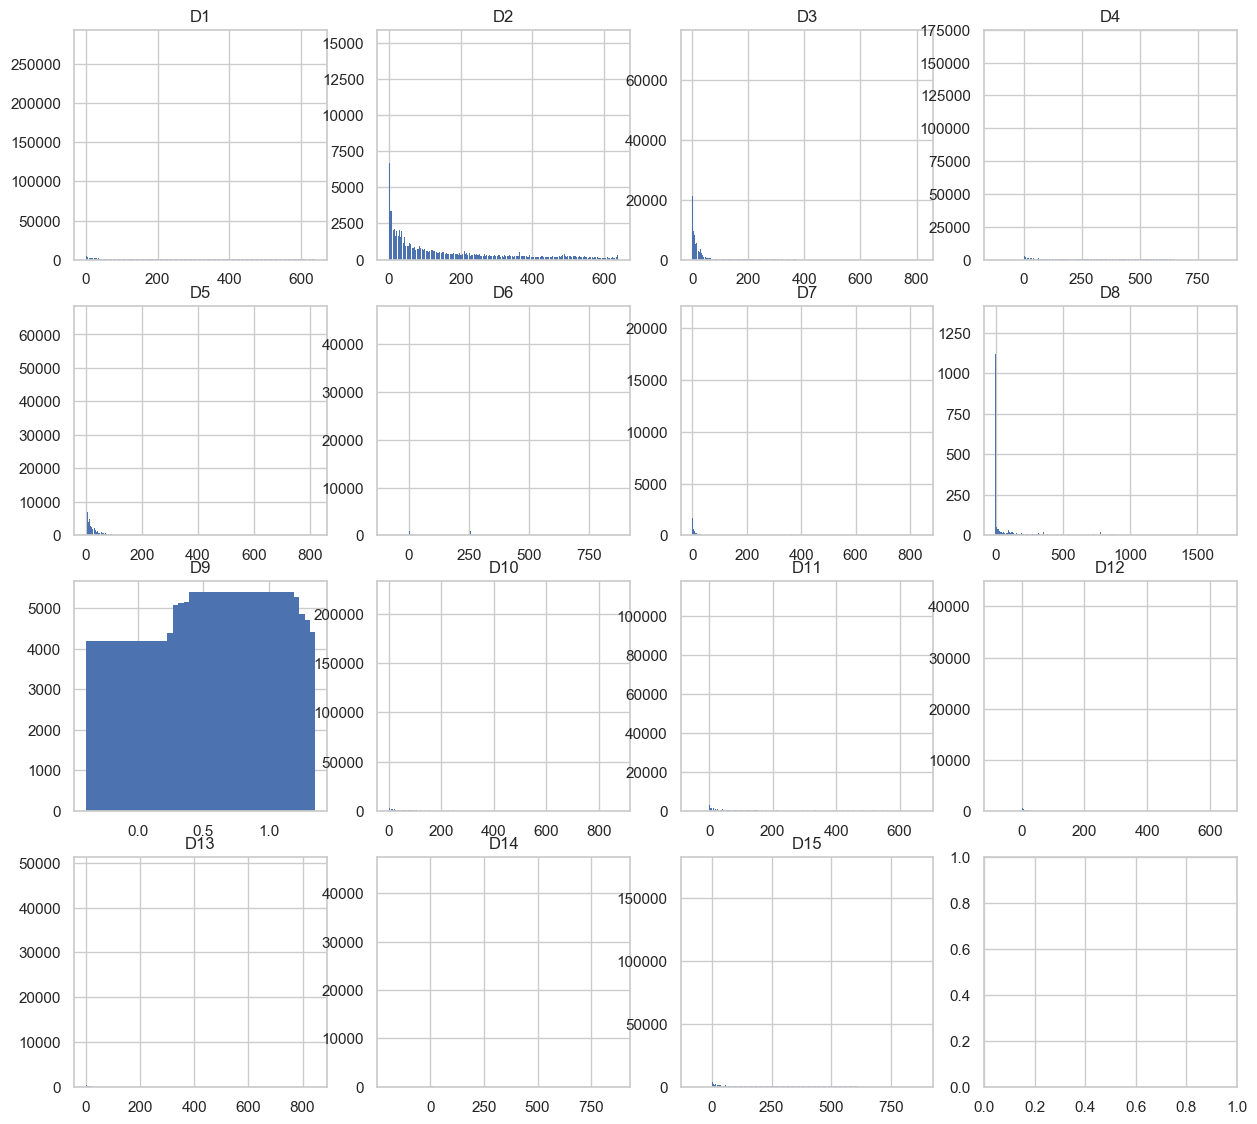

In [306]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize = (15,14))

for ax, feature in zip(axes.flatten(),
                       [column for column in train_trans.columns.tolist() if column.startswith('D')]):
    
    ax.bar(train_trans[feature].value_counts().index, train_trans[feature].value_counts().values)
    ax.set(title=feature.upper())

Despite a large number of missing values, most of these features (except for D9) seem to be positively skewed with the majority of their values around 0. Are most of them ints?

In [237]:
train_trans_stats.loc[:, [column for column in train_trans.columns.tolist() if column.startswith('D')]]

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
count,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,94.347568,169.563231,28.343348,140.002441,42.335965,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,163.744579
std,157.660387,177.315865,62.384721,191.096774,89.000144,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450,202.726660
min,0.000000,0.000000,0.000000,-122.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000,-83.000000
25%,0.000000,26.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.958333,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,97.000000,8.000000,26.000000,10.000000,0.000000,0.000000,37.875000,0.666666,15.000000,43.000000,0.000000,0.000000,0.000000,52.000000
75%,122.000000,276.000000,27.000000,253.000000,32.000000,40.000000,17.000000,187.958328,0.833333,197.000000,274.000000,13.000000,0.000000,2.000000,314.000000


Yep looks like most of them are

Quickly looking at the most positive and negative correlations with the target

In [ ]:
correlations = train_trans.corr()['isFraud'].sort_values()

In [251]:
neg_corrs = correlations.head(10)
pos_corrs = correlations.tail(10)

In [255]:
corrs = pos_corrs.append(neg_corrs)

In [256]:
corrs

V258       0.297151
V188       0.303582
V189       0.308219
V200       0.318783
V201       0.328005
V242       0.360590
V244       0.364129
V246       0.366878
V257       0.383060
isFraud    1.000000
D8        -0.142636
D7        -0.127199
V48       -0.115786
V49       -0.110920
V90       -0.110168
V29       -0.107852
V91       -0.105453
V69       -0.104521
V30       -0.103088
V70       -0.100900
Name: isFraud, dtype: float64

In [262]:
train_trans[corrs.index].corr()

,V258,V188,V189,V200,V201,V242,V244,V246,V257,isFraud,D8,D7,V48,V49,V90,V29,V91,V69,V30,V70
V258,1.000000,0.441904,0.461633,0.627006,0.637254,0.710043,0.710709,0.740122,0.779436,0.297151,-0.080982,-0.120765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V188,0.441904,1.000000,0.899481,0.784486,0.740297,0.633283,0.655513,0.574379,0.519819,0.303582,-0.172655,-0.095003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V189,0.461633,0.899481,1.000000,0.714006,0.801707,0.645411,0.664891,0.573490,0.516381,0.308219,-0.161009,-0.099327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V200,0.627006,0.784486,0.714006,1.000000,0.941582,0.525953,0.530639,0.680426,0.747843,0.318783,-0.138613,-0.096978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V201,0.637254,0.740297,0.801707,0.941582,1.000000,0.532819,0.537285,0.674866,0.732820,0.328005,-0.136310,-0.101232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V242,0.710043,0.633283,0.645411,0.525953,0.532819,1.000000,0.974318,0.826648,0.753764,0.360590,-0.085007,-0.110176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V244,0.710709,0.655513,0.664891,0.530639,0.537285,0.974318,1.000000,0.829339,0.757727,0.364129,-0.086379,-0.113193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V246,0.740122,0.574379,0.573490,0.680426,0.674866,0.826648,0.829339,1.000000,0.905762,0.366878,-0.088642,-0.115934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V257,0.779436,0.519819,0.516381,0.747843,0.732820,0.753764,0.757727,0.905762,1.000000,0.383060,-0.095893,-0.121150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isFraud,0.297151,0.303582,0.308219,0.318783,0.328005,0.360590,0.364129,0.366878,0.383060,1.000000,-0.142636,-0.127199,-0.115786,-0.110920,-0.110168,-0.107852,-0.105453,-0.104521,-0.103088,-0.100900


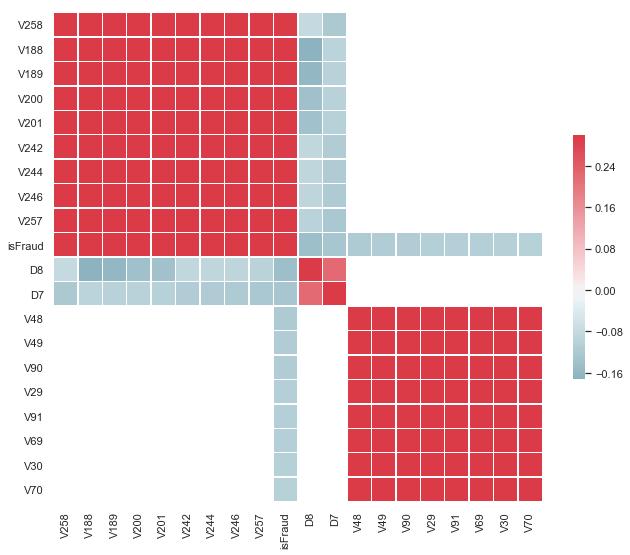

In [265]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_trans[corrs.index].corr(),  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Looks like too many simultaneous missing values between some of our features to calculate a correlation coefficient. Perhaps these features are dependent upon each other or another feature and cannot coexist.